Random Forest Classifier:
Accuracy: 0.4825
              precision    recall  f1-score   support

           0       0.49      0.45      0.47       202
           1       0.48      0.52      0.50       198

    accuracy                           0.48       400
   macro avg       0.48      0.48      0.48       400
weighted avg       0.48      0.48      0.48       400

Confusion Matrix:
 [[ 90 112]
 [ 95 103]]

Gradient Boosting Classifier:
Accuracy: 0.4625
              precision    recall  f1-score   support

           0       0.47      0.46      0.46       202
           1       0.46      0.47      0.46       198

    accuracy                           0.46       400
   macro avg       0.46      0.46      0.46       400
weighted avg       0.46      0.46      0.46       400

Confusion Matrix:
 [[ 92 110]
 [105  93]]


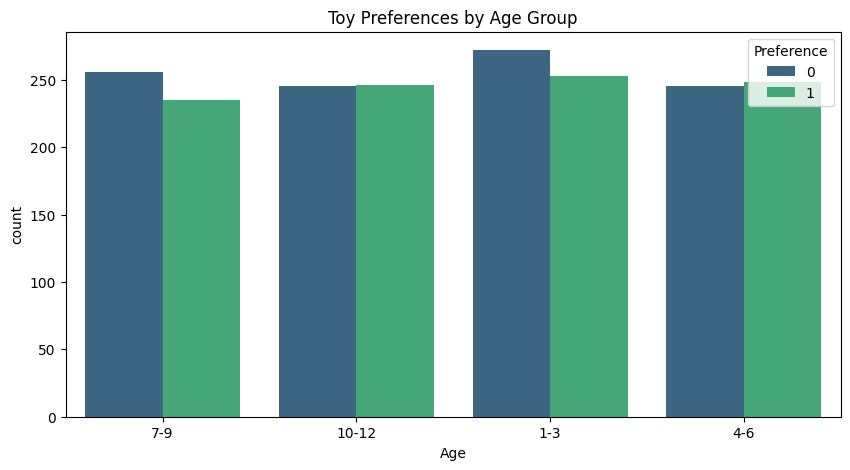

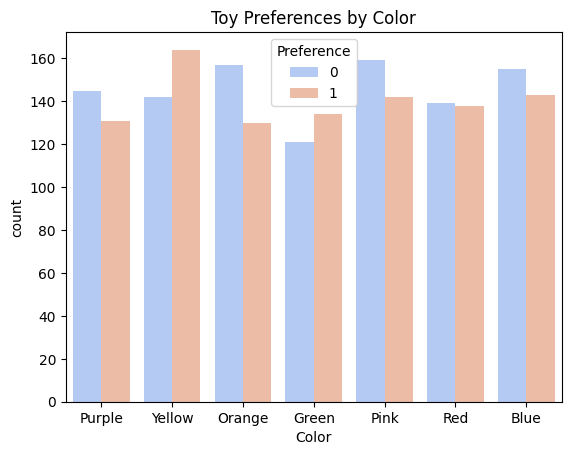

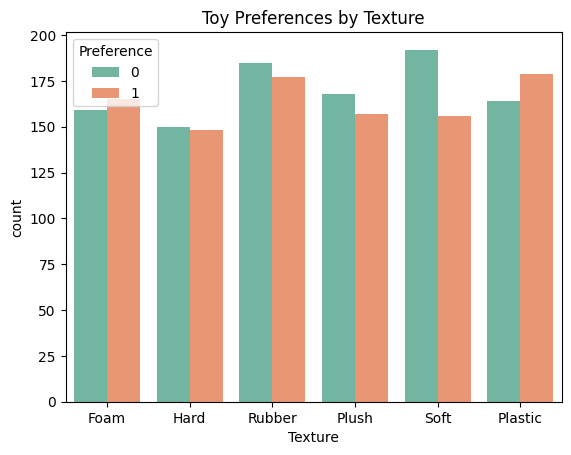

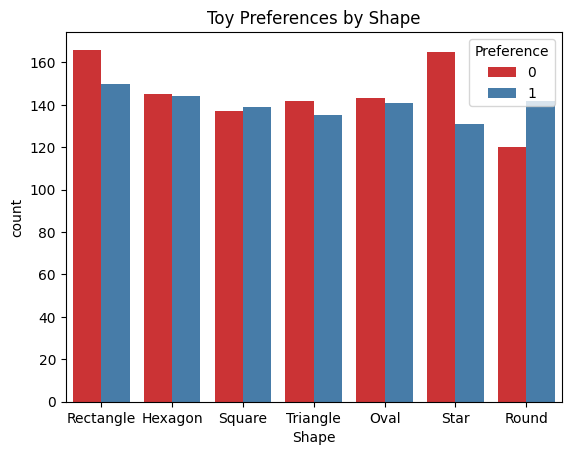

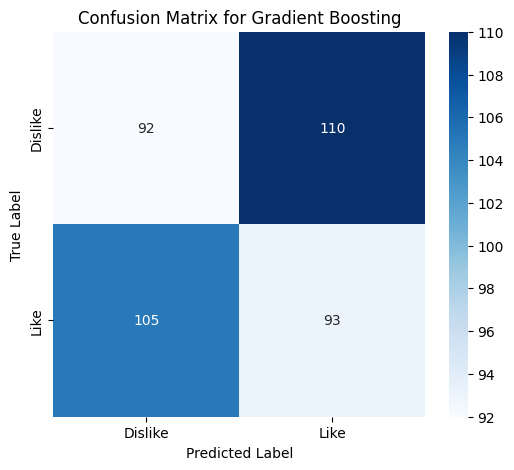

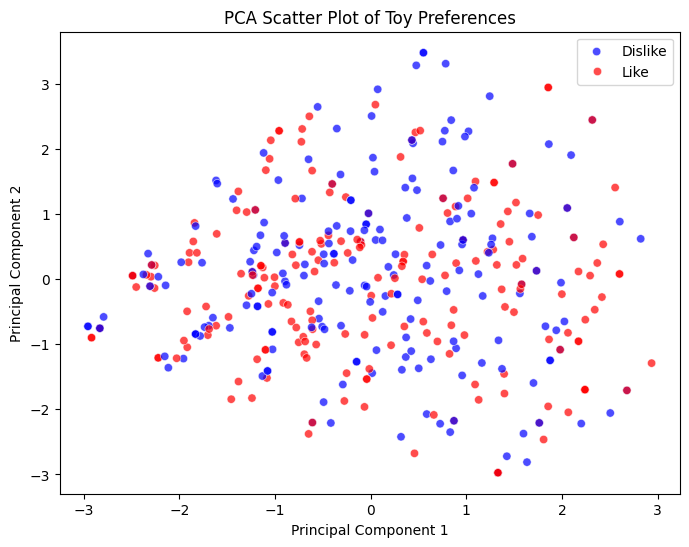

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler



In [ ]:
# Generate larger synthetic dataset
np.random.seed(42)
age_groups = ['1-3', '4-6', '7-9', '10-12']
colors = ['Red', 'Blue', 'Green', 'Yellow', 'Pink', 'Orange', 'Purple']
textures = ['Soft', 'Hard', 'Rubber', 'Plush', 'Plastic', 'Foam']
shapes = ['Round', 'Square', 'Triangle', 'Star', 'Oval', 'Hexagon', 'Rectangle']

data = {
    'Age': np.random.choice(age_groups, 2000),
    'Color': np.random.choice(colors, 2000),
    'Texture': np.random.choice(textures, 2000),
    'Shape': np.random.choice(shapes, 2000),
    'Preference': np.random.choice(['Like', 'Dislike'], 2000)
}

df = pd.DataFrame(data)



In [ ]:
# Encoding categorical variables
le = LabelEncoder()
df['Preference'] = le.fit_transform(df['Preference'])
df_encoded = pd.get_dummies(df, columns=['Age', 'Color', 'Texture', 'Shape'])



In [ ]:
# Standardizing data
scaler = StandardScaler()
X = scaler.fit_transform(df_encoded.drop(columns=['Preference']))
y = df['Preference']



In [ ]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Train advanced ML models
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)

rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)



In [ ]:
# Predictions
rf_pred = rf_clf.predict(X_test)
gb_pred = gb_clf.predict(X_test)



In [ ]:
# Evaluation
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))

print("\nGradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, gb_pred))
print(classification_report(y_test, gb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_pred))



In [ ]:
# Visualization of preferences
plt.figure(figsize=(10,5))
sns.countplot(x='Age', hue='Preference', data=df, palette='viridis')
plt.title('Toy Preferences by Age Group')
plt.show()

sns.countplot(x='Color', hue='Preference', data=df, palette='coolwarm')
plt.title('Toy Preferences by Color')
plt.show()

sns.countplot(x='Texture', hue='Preference', data=df, palette='Set2')
plt.title('Toy Preferences by Texture')
plt.show()

sns.countplot(x='Shape', hue='Preference', data=df, palette='Set1')
plt.title('Toy Preferences by Shape')
plt.show()



In [ ]:
# Confusion Matrix Visualization
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, gb_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Dislike', 'Like'], yticklabels=['Dislike', 'Like'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()



In [ ]:
# PCA for Scatter Plot (Dimensionality Reduction)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_test, palette=['red', 'blue'], alpha=0.7)
plt.title('PCA Scatter Plot of Toy Preferences')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(labels=['Dislike', 'Like'])
plt.show()